In [4]:
from data import ForexData
from Trademanager import Trademanager
from Technicals import Indicator

In [5]:
df = Trademanager().fetch_data(instrument="AUD_USD")


In [6]:
df = Indicator().WAE(df)

In [7]:
df

,instrument,Time,granularity,Open,High,Low,Close,smaHigh,smaLow,sslDown,...,TP,baseline,macd,std,bb_upper,bb_lower,t1,e1,trendUp,trendDown
0,AUD_USD,2024-06-21 09:56:00+10:00,M1,0.66606,0.66626,0.66606,0.66624,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,AUD_USD,2024-06-21 09:57:00+10:00,M1,0.66620,0.66624,0.66620,0.66624,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,AUD_USD,2024-06-21 09:58:00+10:00,M1,0.66621,0.66624,0.66618,0.66618,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
3,AUD_USD,2024-06-21 09:59:00+10:00,M1,0.66614,0.66614,0.66605,0.66605,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
4,AUD_USD,2024-06-21 10:00:00+10:00,M1,0.66606,0.66621,0.66605,0.66617,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,AUD_USD,2024-06-21 16:35:00+10:00,M1,0.66643,0.66644,0.66634,0.66634,0.666364,0.666278,0.666278,...,0.666427,0.666332,-0.000036,0.000045,0.666422,0.666243,0.000335,0.000178,0.000335,0.000000
396,AUD_USD,2024-06-21 16:36:00+10:00,M1,0.66631,0.66633,0.66628,0.66628,0.666365,0.666278,0.666278,...,0.666365,0.666330,-0.000037,0.000043,0.666417,0.666243,-0.000104,0.000174,0.000000,0.000104
397,AUD_USD,2024-06-21 16:37:00+10:00,M1,0.66628,0.66632,0.66624,0.66624,0.666366,0.666280,0.666366,...,0.666155,0.666331,-0.000039,0.000046,0.666423,0.666240,-0.000343,0.000183,0.000000,0.000343
398,AUD_USD,2024-06-21 16:38:00+10:00,M1,0.66624,0.66633,0.66624,0.66630,0.666361,0.666276,0.666276,...,0.666385,0.666326,-0.000038,0.000046,0.666418,0.666235,0.000151,0.000183,0.000151,0.000000


In [24]:
df = df.iloc[100:150]

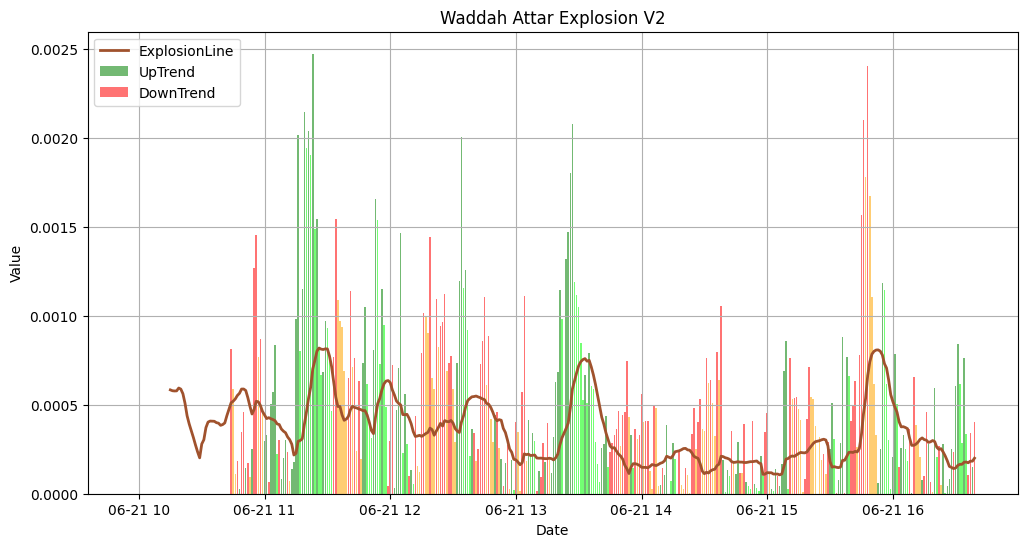

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Plot trends as columns
plt.bar(df['Time'], df['trendUp'], color=np.where(df['trendUp'] < df['trendUp'].shift(1), 'lime', 'green'), alpha=0.55, label='UpTrend',width = 0.0005)
plt.bar(df['Time'], df['trendDown'], color=np.where(df['trendDown'] < df['trendDown'].shift(1), 'orange', 'red'), alpha=0.55, label='DownTrend',width = 0.0005)

# Plot e1 as a line
plt.plot(df['Time'], df['e1'], color='#A0522D', linewidth=2, label='ExplosionLine')

plt.title('Waddah Attar Explosion V2')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Correct import for make_subplots

# Create a figure using subplots and add the trace to it

fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

fig.add_trace(go.Candlestick(
    x=df['Time'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick',
    line=dict(width=1),
    opacity=1,
    increasing_fillcolor='#24A06B',
    decreasing_fillcolor="#CC2E3C",
    increasing_line_color='#2EC886',
    decreasing_line_color='#FF3A4C'  # Plot on the primary y-axis
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['baseline'],
    name='BASELINE',
    mode='lines',
    line=dict(color='yellow', width=2)  # Plot on the secondary y-axis
), row=1, col=1)


fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['sslUp'],
    name='SSLU',
    line=dict(color='aqua', width=2),  # Plot on the secondary y-axis
), row=1, col=1)

# SSLD trace
fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['sslDown'],
    name='SSLD',
    line=dict(color='pink', width=2),  # Plot on the secondary y-axis
), row=1, col=1)


# WAE chart
fig.add_trace(go.Bar(
    x=df['Time'],
    y=df['trendUp'],
    marker_color=np.where(df['trendUp'] < df['trendUp'].shift(1), 'lime', 'green'),
    name='UpTrend',
    width=0.04,
    marker_line_color='rgba(0,0,0,0)',  # Hides the marker border
    marker_line_width=0,  # Sets the marker border width to 0
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df['Time'],
    y=df['trendDown'],
    marker_color=np.where(df['trendDown'] < df['trendDown'].shift(1), 'orange', 'red'),
    name='DownTrend',
    width=0.04,
    marker_line_color='rgba(0,0,0,0)',  # Hides the marker border
    marker_line_width=0,  # Sets the marker border width to 0
), row=2, col=1)


fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['e1'],
    mode='lines',
    name='ExplosionLine',
    line=dict(color='#A0522D', width=2)
), row=2, col=1)

# Update layout for WAE chart
fig.update_layout(
    title='Candlestick Chart with WAE',
    xaxis_title='Date',
    height=800,
    width=1200,
    margin=dict(l=50, r=50, b=50, t=100),
    paper_bgcolor="#1e1e1e",
    plot_bgcolor="#1e1e1e",
    font=dict(size=10, color="#e1e1e1"),
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h')
)

# Update y-axis range for the Candlestick chart (row 1)
fig.update_layout(
    width=1500,
    height=500,
    margin=dict(l=10, r=10, b=10, t=10),
    font=dict(size=10, color="#e1e1e1"),
    paper_bgcolor="#1e1e1e",
    plot_bgcolor="#1e1e1e",
    xaxis_title='Time',
    yaxis_title='Price',
    title='Candlestick Chart with MA5'
)

fig.update_xaxes(
    gridcolor="#1f292f",
    showgrid=True,
    fixedrange=True,
    rangeslider=dict(visible=True)
)

fig.update_yaxes(
    gridcolor="#1f292f",
    showgrid=True)

fig.show()

In [17]:
df.columns

Index(['instrument', 'Time', 'granularity', 'Open', 'High', 'Low', 'Close',
       'smaHigh', 'smaLow', 'sslDown', 'sslUp', 'Position', 'SIGNAL',
       'SSL_BUY', 'SSL_SELL', 'ATR', 'atrup', 'atrdown', 'SL', 'TP',
       'baseline', 'macd', 'std', 'bb_upper', 'bb_lower', 't1', 'e1',
       'trendUp', 'trendDown'],
      dtype='object')

In [18]:
final_df = df.drop(columns=['smaHigh', 'smaLow', 'sslDown', 'sslUp','ATR', 'atrup', 'atrdown', 'SL', 'TP','std', 'bb_upper', 'bb_lower',])

In [21]:
final_df.iloc[100:150]

,instrument,Time,granularity,Open,High,Low,Close,Position,SIGNAL,SSL_BUY,SSL_SELL,baseline,macd,t1,e1,trendUp,trendDown
100,AUD_USD,2024-06-21 11:36:00+10:00,M1,0.66580,0.66586,0.66574,0.66582,sell,False,False,False,0.665950,4.345860e-05,-0.000971,0.000490,0.000000,0.000971
101,AUD_USD,2024-06-21 11:37:00+10:00,M1,0.66586,0.66588,0.66578,0.66581,sell,False,False,False,0.665919,3.721820e-05,-0.000936,0.000442,0.000000,0.000936
102,AUD_USD,2024-06-21 11:38:00+10:00,M1,0.66582,0.66584,0.66581,0.66583,sell,False,False,False,0.665887,3.260378e-05,-0.000692,0.000413,0.000000,0.000692
103,AUD_USD,2024-06-21 11:39:00+10:00,M1,0.66582,0.66587,0.66574,0.66586,sell,False,False,False,0.665860,2.987474e-05,-0.000409,0.000419,0.000000,0.000409
104,AUD_USD,2024-06-21 11:40:00+10:00,M1,0.66584,0.66585,0.66580,0.66582,sell,False,False,False,0.665830,2.552897e-05,-0.000652,0.000434,0.000000,0.000652
105,AUD_USD,2024-06-21 11:41:00+10:00,M1,0.66579,0.66579,0.66570,0.66574,sell,False,False,False,0.665810,1.795366e-05,-0.001136,0.000472,0.000000,0.001136
106,AUD_USD,2024-06-21 11:42:00+10:00,M1,0.66575,0.66578,0.66570,0.66578,buy,True,True,False,0.665810,1.320904e-05,-0.000712,0.000491,0.000000,0.000712
107,AUD_USD,2024-06-21 11:43:00+10:00,M1,0.66578,0.66581,0.66572,0.66576,buy,False,False,False,0.665803,8.135181e-06,-0.000761,0.000485,0.000000,0.000761
108,AUD_USD,2024-06-21 11:44:00+10:00,M1,0.66576,0.66582,0.66574,0.66582,buy,False,False,False,0.665803,6.518138e-06,-0.000243,0.000482,0.000000,0.000243
109,AUD_USD,2024-06-21 11:45:00+10:00,M1,0.66582,0.66584,0.66576,0.66576,buy,False,False,False,0.665796,2.308728e-06,-0.000631,0.000476,0.000000,0.000631


In [23]:
final_df['WAE_BUY']=np.where(final_df['trendUp']>final_df['e1'],"volume","no_volume")

In [25]:
final_df['WAE_SELL']=np.where(final_df['trendDown']>final_df['e1'],"volume","no_volume")

In [27]:
final_df.iloc[100:150]

,instrument,Time,granularity,Open,High,Low,Close,Position,SIGNAL,SSL_BUY,SSL_SELL,baseline,macd,t1,e1,trendUp,trendDown,WAE_BUY,WAE_SELL
100,AUD_USD,2024-06-21 11:36:00+10:00,M1,0.66580,0.66586,0.66574,0.66582,sell,False,False,False,0.665950,4.345860e-05,-0.000971,0.000490,0.000000,0.000971,no_volume,volume
101,AUD_USD,2024-06-21 11:37:00+10:00,M1,0.66586,0.66588,0.66578,0.66581,sell,False,False,False,0.665919,3.721820e-05,-0.000936,0.000442,0.000000,0.000936,no_volume,volume
102,AUD_USD,2024-06-21 11:38:00+10:00,M1,0.66582,0.66584,0.66581,0.66583,sell,False,False,False,0.665887,3.260378e-05,-0.000692,0.000413,0.000000,0.000692,no_volume,volume
103,AUD_USD,2024-06-21 11:39:00+10:00,M1,0.66582,0.66587,0.66574,0.66586,sell,False,False,False,0.665860,2.987474e-05,-0.000409,0.000419,0.000000,0.000409,no_volume,no_volume
104,AUD_USD,2024-06-21 11:40:00+10:00,M1,0.66584,0.66585,0.66580,0.66582,sell,False,False,False,0.665830,2.552897e-05,-0.000652,0.000434,0.000000,0.000652,no_volume,volume
105,AUD_USD,2024-06-21 11:41:00+10:00,M1,0.66579,0.66579,0.66570,0.66574,sell,False,False,False,0.665810,1.795366e-05,-0.001136,0.000472,0.000000,0.001136,no_volume,volume
106,AUD_USD,2024-06-21 11:42:00+10:00,M1,0.66575,0.66578,0.66570,0.66578,buy,True,True,False,0.665810,1.320904e-05,-0.000712,0.000491,0.000000,0.000712,no_volume,volume
107,AUD_USD,2024-06-21 11:43:00+10:00,M1,0.66578,0.66581,0.66572,0.66576,buy,False,False,False,0.665803,8.135181e-06,-0.000761,0.000485,0.000000,0.000761,no_volume,volume
108,AUD_USD,2024-06-21 11:44:00+10:00,M1,0.66576,0.66582,0.66574,0.66582,buy,False,False,False,0.665803,6.518138e-06,-0.000243,0.000482,0.000000,0.000243,no_volume,no_volume
109,AUD_USD,2024-06-21 11:45:00+10:00,M1,0.66582,0.66584,0.66576,0.66576,buy,False,False,False,0.665796,2.308728e-06,-0.000631,0.000476,0.000000,0.000631,no_volume,volume


In [45]:
final_df['final_signal_buy'] = (final_df['SSL_BUY']) & (final_df['trendUp'] > final_df['e1'])

# Creating a boolean flag where both 'SSL_SELL' is True and 'trendDown' is greater than 0
final_df['final_signal_sell'] = (final_df['SSL_SELL']) & (final_df['trendDown'] > final_df['e1'])

In [36]:
final_df.drop(columns=)

Index(['instrument', 'Time', 'granularity', 'Open', 'High', 'Low', 'Close',
       'Position', 'SIGNAL', 'SSL_BUY', 'SSL_SELL', 'baseline', 'macd', 't1',
       'e1', 'trendUp', 'trendDown', 'WAE_BUY', 'WAE_SELL', 'final_signal_buy',
       'final_signal_sell'],
      dtype='object')

In [46]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Correct import for make_subplots
import numpy as np

# Create a figure using subplots with 2 rows and shared x-axes
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add a candlestick trace to the first row
fig.add_trace(go.Candlestick(
    x=final_df['Time'],
    open=final_df['Open'],
    high=final_df['High'],
    low=final_df['Low'],
    close=final_df['Close'],
    name='Candlestick',
    line=dict(width=1),
    opacity=1,
    increasing_fillcolor='#24A06B',
    decreasing_fillcolor="#CC2E3C",
    increasing_line_color='#2EC886',
    decreasing_line_color='#FF3A4C'
), row=1, col=1)

# BASELINE trace on the first row
fig.add_trace(go.Scatter(
    x=final_df['Time'],
    y=final_df['baseline'],
    name='BASELINE',
    mode='lines',
    line=dict(color='yellow', width=2)
), row=1, col=1)

# SSLU trace on the first row
fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['sslUp'],
    name='SSLU',
    line=dict(color='aqua', width=2)
), row=1, col=1)

# SSLD trace on the first row
fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['sslDown'],
    name='SSLD',
    line=dict(color='pink', width=2)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=final_df[final_df['final_signal_buy']]['Time'],  # Filter for 'Time' where 'final_signal_buy' is True
    y=final_df[final_df['final_signal_buy']]['Open'],  # Filter for 'Open' where 'final_signal_buy' is True
    name="BUY_ARROW",
    mode='markers',
    marker=dict(
        color='green',
        size=10,  # Adjust the size as needed
        symbol='triangle-up'  # Correct attribute for the shape of the marker
    )
),row =1,col =1)

# WAE chart for trendUp on the second row
fig.add_trace(go.Bar(
    x=final_df['Time'],
    y=final_df['trendUp'],
    marker_color=np.where(final_df['trendUp'] < final_df['trendUp'].shift(1), 'lime', 'green'),
    name='UpTrend',
    width=0.04,
    marker_line_color='rgba(0,0,0,0)',  # Hides the marker border
    marker_line_width=0
), row=2, col=1)

# WAE chart for trendDown on the second row
fig.add_trace(go.Bar(
    x=final_df['Time'],
    y=final_df['trendDown'],
    marker_color=np.where(final_df['trendDown'] < final_df['trendDown'].shift(1), 'orange', 'red'),
    name='DownTrend',
    width=0.04,
    marker_line_color='rgba(0,0,0,0)',  # Hides the marker border
    marker_line_width=0
), row=2, col=1)

# Explosion line trace on the second row
fig.add_trace(go.Scatter(
    x=final_df['Time'],
    y=final_df['e1'],
    mode='lines',
    name='ExplosionLine',
    line=dict(color='#A0522D', width=2)
), row=2, col=1)

# Update layout for WAE chart
fig.update_layout(
    title='Candlestick Chart with WAE',
    xaxis_title='Date',
    yaxis_title='Price',
    height=800,
    width=1200,
    margin=dict(l=50, r=50, b=50, t=100),
    paper_bgcolor="#1e1e1e",
    plot_bgcolor="#1e1e1e",
    font=dict(size=10, color="#e1e1e1"),
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h')
)

# Update layout for WAE chart
fig.update_layout(
    title='Candlestick Chart with WAE',
    xaxis_title='Date',
    height=800,
    width=1200,
    margin=dict(l=50, r=50, b=50, t=100),
    paper_bgcolor="#1e1e1e",
    plot_bgcolor="#1e1e1e",
    font=dict(size=10, color="#e1e1e1"),
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h')
)

# Update y-axis range for the Candlestick chart (row 1)
fig.update_layout(
    width=1500,
    height=500,
    margin=dict(l=10, r=10, b=10, t=10),
    font=dict(size=10, color="#e1e1e1"),
    paper_bgcolor="#1e1e1e",
    plot_bgcolor="#1e1e1e",
    xaxis_title='Time',
    yaxis_title='Price',
    title='Candlestick Chart with MA5'
)

fig.update_xaxes(
    gridcolor="#1f292f",
    showgrid=True,
    fixedrange=True,
    rangeslider=dict(visible=True)
)

fig.update_yaxes(
    gridcolor="#1f292f",
    showgrid=True)

fig.show()

In [47]:
final_df[final_df['final_signal_buy']]

,instrument,Time,granularity,Open,High,Low,Close,Position,SIGNAL,SSL_BUY,...,baseline,macd,t1,e1,trendUp,trendDown,WAE_BUY,WAE_SELL,final_signal_buy,final_signal_sell
79,AUD_USD,2024-06-21 11:15:00+10:00,M1,0.66552,0.66572,0.66544,0.66566,buy,True,True,...,0.665573,-0.000079,0.000981,0.000227,0.000981,0.0,volume,no_volume,True,False
330,AUD_USD,2024-06-21 15:30:00+10:00,M1,0.66663,0.66676,0.66663,0.66670,buy,True,True,...,0.666655,-0.000019,0.000253,0.000181,0.000253,0.0,volume,no_volume,True,False
390,AUD_USD,2024-06-21 16:30:00+10:00,M1,0.66622,0.66634,0.66622,0.66634,buy,True,True,...,0.666289,-0.000055,0.000608,0.000145,0.000608,0.0,volume,no_volume,True,False


In [48]:
final_df[final_df['final_signal_sell']]

,instrument,Time,granularity,Open,High,Low,Close,Position,SIGNAL,SSL_BUY,...,baseline,macd,t1,e1,trendUp,trendDown,WAE_BUY,WAE_SELL,final_signal_buy,final_signal_sell
59,AUD_USD,2024-06-21 10:55:00+10:00,M1,0.66576,0.66576,0.66555,0.66556,sell,True,False,...,0.665736,-8.200906e-05,-0.001268,0.000473,0.0,0.001268,no_volume,volume,False,True
97,AUD_USD,2024-06-21 11:33:00+10:00,M1,0.66604,0.66604,0.66586,0.66590,sell,True,False,...,0.666018,6.747252e-05,-0.000766,0.000630,0.0,0.000766,no_volume,volume,False,True
136,AUD_USD,2024-06-21 12:12:00+10:00,M1,0.66620,0.66623,0.66617,0.66618,sell,True,False,...,0.666238,8.587245e-05,-0.000435,0.000322,0.0,0.000435,no_volume,volume,False,True
139,AUD_USD,2024-06-21 12:15:00+10:00,M1,0.66620,0.66620,0.66613,0.66614,sell,True,False,...,0.666211,7.873757e-05,-0.000792,0.000322,0.0,0.000792,no_volume,volume,False,True
184,AUD_USD,2024-06-21 13:00:00+10:00,M1,0.66607,0.66609,0.66602,0.66604,sell,True,False,...,0.666092,-5.530627e-07,-0.000402,0.000190,0.0,0.000402,no_volume,volume,False,True
187,AUD_USD,2024-06-21 13:03:00+10:00,M1,0.66604,0.66606,0.66600,0.66600,sell,True,False,...,0.666066,-6.772537e-06,-0.000570,0.000174,0.0,0.000570,no_volume,volume,False,True
197,AUD_USD,2024-06-21 13:13:00+10:00,M1,0.66604,0.66606,0.66602,0.66602,sell,True,False,...,0.666074,-8.666079e-06,-0.000284,0.000198,0.0,0.000284,no_volume,volume,False,True
199,AUD_USD,2024-06-21 13:15:00+10:00,M1,0.66606,0.66606,0.66600,0.66600,sell,True,False,...,0.666061,-1.012294e-05,-0.000398,0.000197,0.0,0.000398,no_volume,volume,False,True
236,AUD_USD,2024-06-21 13:53:00+10:00,M1,0.66660,0.66660,0.66656,0.66656,sell,True,False,...,0.666596,9.836522e-05,-0.000744,0.000141,0.0,0.000744,no_volume,volume,False,True
265,AUD_USD,2024-06-21 14:24:00+10:00,M1,0.66678,0.66678,0.66676,0.66677,sell,True,False,...,0.666784,7.261916e-05,-0.000336,0.000230,0.0,0.000336,no_volume,volume,False,True
